<h2>Import Packages</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
from scipy.stats import skew

#Dataset all columns full displayed
pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

<h2>Load the Dataset</h2>

In [2]:
#Load the dataset
house_train = pd.read_csv('House/train.csv')
house_test = pd.read_csv('House/test.csv')

In [3]:
#print train and Test shape data
print(f"Train shape: {house_train.shape}")
print(f"Test shape: {house_test.shape}")

Train shape: (1460, 81)
Test shape: (1459, 80)


In [4]:
#Display the first 3 row of train data set
house_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
#Backup ID column
train_ID = house_train['Id']
test_ID = house_test['Id']

#Drop ID column
house_train.drop(['Id'], axis=1, inplace=True)
house_test.drop(['Id'], axis=1, inplace=True)

In [6]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [7]:
#Merging training data and test data
house_train2 = house_train.drop(['SalePrice'], axis = 1)
house_pp = pd.concat([house_train2, house_test], axis = 0)

<h2>Checking Missing Value</h2>

In [8]:
#Checking total and percentage of missing values
house_pp_null = ((house_pp.isnull().sum()/len(house_pp))*100).sort_values(ascending = False)
house_pp_null.head(35)

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
FireplaceQu     48.65
LotFrontage     16.65
GarageCond       5.45
GarageQual       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageType       5.38
BsmtCond         2.81
BsmtExposure     2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
BsmtHalfBath     0.07
Utilities        0.07
Functional       0.07
BsmtFullBath     0.07
BsmtFinSF2       0.03
BsmtFinSF1       0.03
Exterior2nd      0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Exterior1st      0.03
SaleType         0.03
Electrical       0.03
KitchenQual      0.03
GarageArea       0.03
GarageCars       0.03
OverallQual      0.00
dtype: float64

In [9]:
#Fill the columns whose missing values per cent more than 20% with None
fill_none_20 = house_pp_null[house_pp_null > 20].keys()
print(fill_none_20)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')


In [10]:
house_pp[['PoolQC', 'MiscFeature', 'Alley',
          'Fence', 'FireplaceQu']] = house_pp[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].fillna("None")

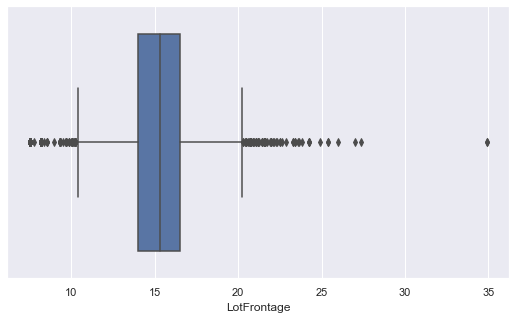

In [53]:
plt.figure(figsize = (9, 5))
sns.boxplot(house_pp['LotFrontage'])

In [12]:
#fill the LotFrontage missing values column with median
house_pp["LotFrontage"] = house_pp.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
#Fill the garage object data missing values with None
house_pp[['GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond']] = house_pp[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna("None")

In [14]:
#Fill the garage int and float data missing values with 0
house_pp[['GarageYrBlt', 'GarageArea', 'GarageCars']] = house_pp[['GarageYrBlt', 'GarageArea', 'GarageCars']].fillna(0)

In [15]:
#Fill the basement object data missing values with None
house_pp[['BsmtCond', 'BsmtExposure', 
          'BsmtQual', 'BsmtFinType1', 
          'BsmtFinType2']] = house_pp[['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

In [16]:
#Fill the basement int and float data missing values with 0
house_pp[['BsmtHalfBath', 'BsmtFullBath', 
          'BsmtUnfSF', 'BsmtFinSF1', 
          'BsmtFinSF2', 'TotalBsmtSF']] = house_pp[['BsmtHalfBath', 'BsmtFullBath', 
                                                    'BsmtUnfSF', 'BsmtFinSF1', 
                                                    'BsmtFinSF2', 'TotalBsmtSF']].fillna(0)

In [17]:
#Fill MasVnrArea float data missing values with 0 and MasVnrType object data missing values with None
house_pp["MasVnrType"] = house_pp["MasVnrType"].fillna("None")
house_pp["MasVnrArea"] = house_pp["MasVnrArea"].fillna(0)

In [18]:
#Fill MSZoning object data missung value with mode
house_pp['MSZoning'] = house_pp['MSZoning'].fillna(house_pp['MSZoning'].mode()[0])

In [19]:
#Fill Utilities object data missung value with mode
house_pp['Utilities'] = house_pp['Utilities'].fillna(house_pp['Utilities'].mode()[0])

In [20]:
#Fill Functional object data missung value with Typ
house_pp["Functional"] = house_pp["Functional"].fillna("Typ") #Typ mean Typical

In [21]:
#Fill Exterior1st & Exterior2nd object data missung value with mode
house_pp['Exterior1st'] = house_pp['Exterior1st'].fillna(house_pp['Exterior1st'].mode()[0])
house_pp['Exterior2nd'] = house_pp['Exterior2nd'].fillna(house_pp['Exterior2nd'].mode()[0])

In [22]:
#Fill SaleType object data missung value with mode
house_pp['SaleType'] = house_pp['SaleType'].fillna(house_pp['SaleType'].mode()[0])

In [23]:
#Fill Electrical object data missung value with mode
house_pp['Electrical'] = house_pp['Electrical'].fillna(house_pp['Electrical'].mode()[0])

In [24]:
#Fill KitchenQual object data missung value with mode
house_pp['KitchenQual'] = house_pp['KitchenQual'].fillna(house_pp['KitchenQual'].mode()[0])

In [25]:
house_pp.isnull().sum().any()

False

In [26]:
house_train = pd.concat([house_pp.iloc[:house_train.shape[0],:],house_train['SalePrice']], axis=1)

<h2>Exploratory Data Analysis</h2>

<h3>Distribution plot</h3>

In [27]:
house_train['SalePrice'].describe()

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

SalePrice Skewness: 1.88
Kurtosis: 6.53


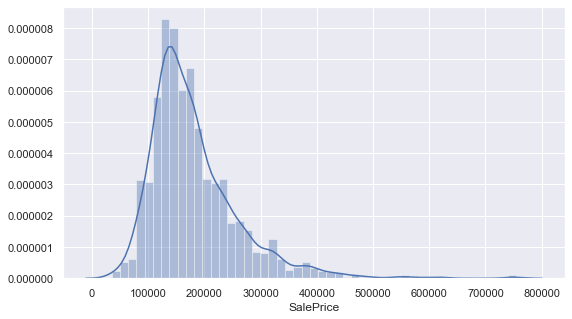

In [54]:
#Checking SalePrice distribution
plt.figure(figsize = (9,5))
sns.distplot(house_train['SalePrice'])
print(f"SalePrice Skewness: {round(house_train['SalePrice'].skew(), 2)}")
print(f"Kurtosis: {round(house_train['SalePrice'].kurt(), 2)}") 

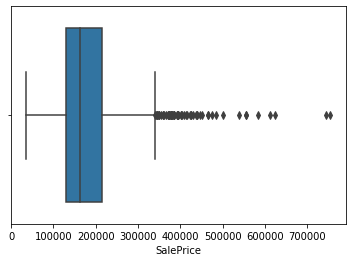

In [29]:
sns.boxplot(house_train['SalePrice'])

<h3>Correlation Value</h3>

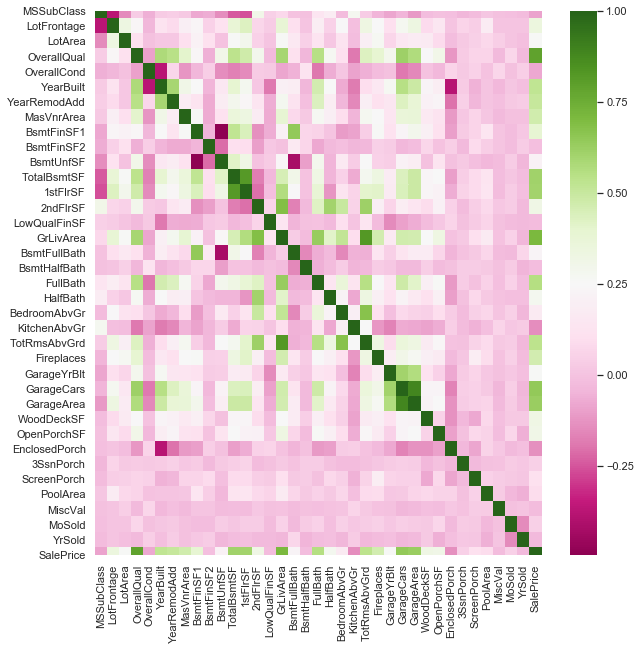

In [55]:
#Checking correlation
plt.figure(figsize = (10,10))
heat = sns.heatmap(house_train.corr(), cmap = 'PiYG')

In [31]:
#Pick correlation value with >= 0.5
the_corrs = house_train.corr()
the_corrs[abs(the_corrs['SalePrice'].values) >= 0.5]['SalePrice'].sort_values(ascending = False)[1:]

OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
Name: SalePrice, dtype: float64

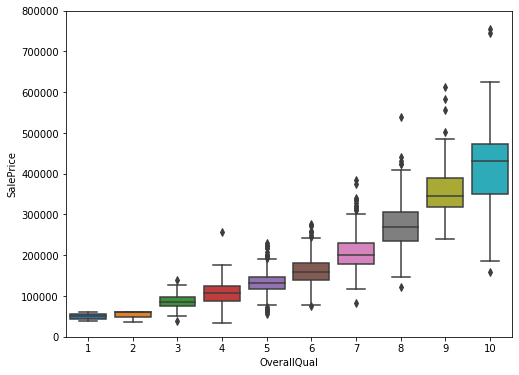

In [32]:
# Overall Quality vs Sale Price
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = house_train['OverallQual'], y = house_train["SalePrice"])
fig.axis(ymin=0, ymax=800000);

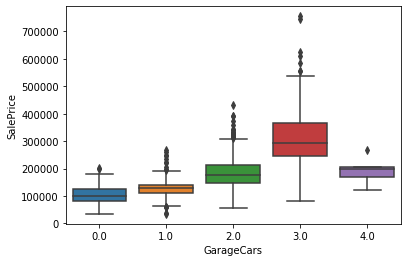

In [33]:
# Garage Area vs Sale Price
sns.boxplot(x = house_train['GarageCars'], y = house_train['SalePrice'])

In [34]:
# Removing outliers manually (More than 4-cars, less than $300k)
house_train = house_train.drop(house_train[(house_train['GarageCars']>3) 
                         & (house_train['SalePrice']<300000)].index).reset_index(drop=True)

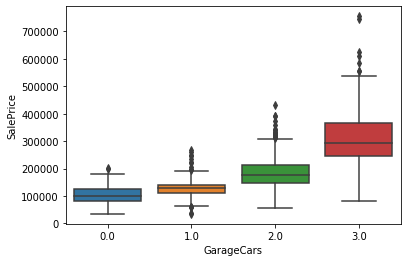

In [35]:
sns.boxplot(x = house_train['GarageCars'], y = house_train['SalePrice'])

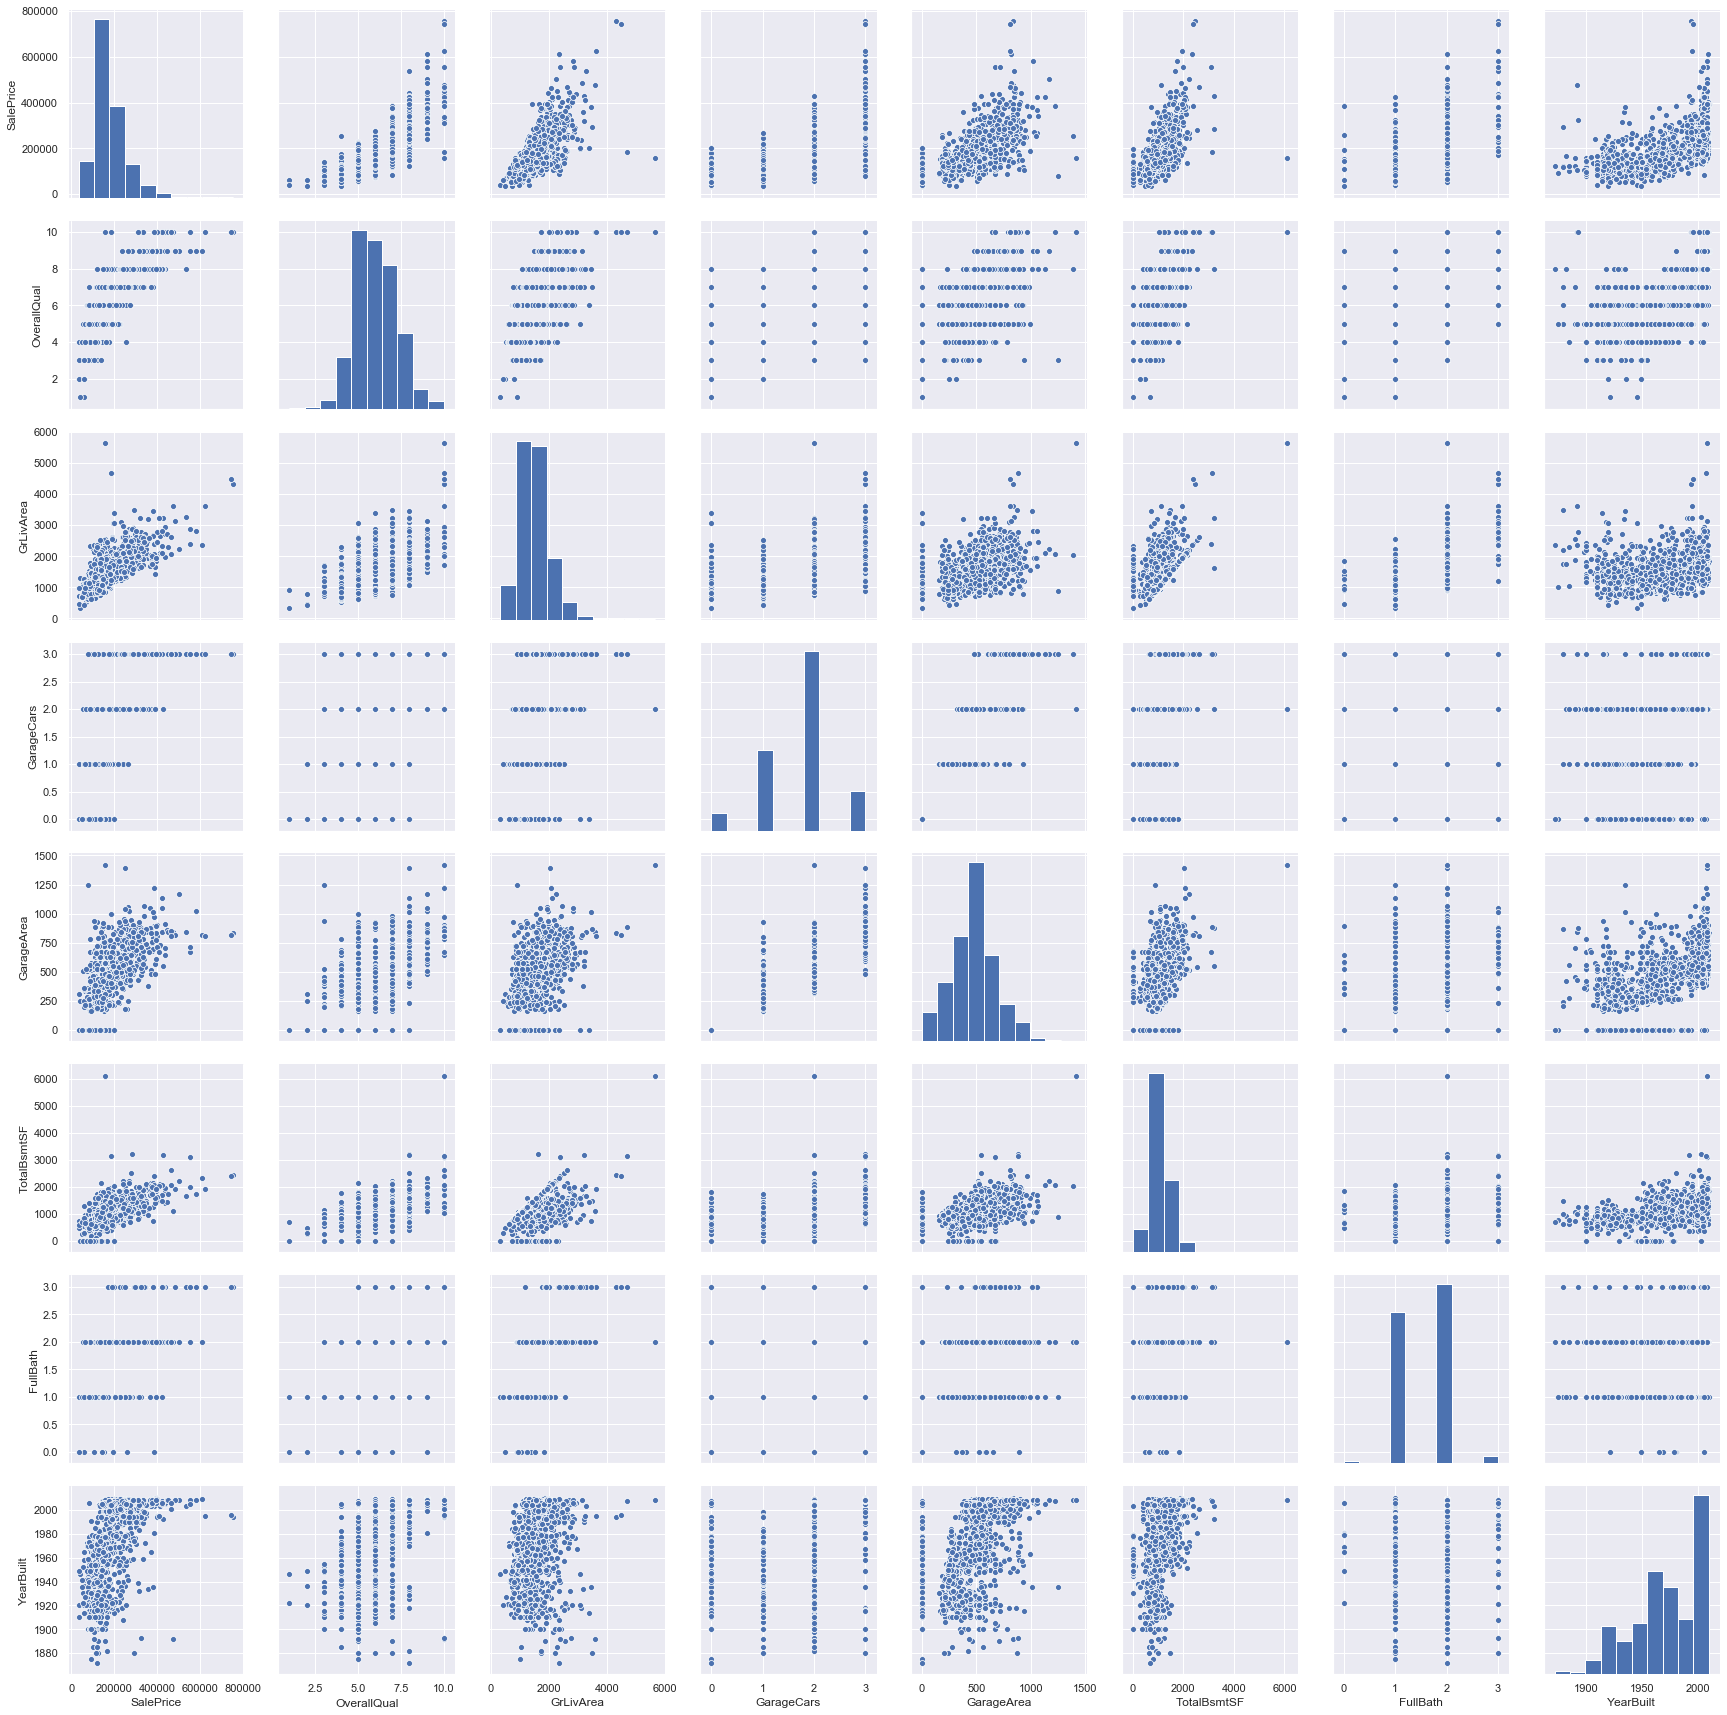

In [36]:
#Pairplot of High Correlated columns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_train[cols], size = 3)

<h2>Separating Categorical Data and Continous (Numerical) Data</h2>

In [37]:
#Find All Categorical Data
catg = []
for col in house_pp.columns.values:
    if house_pp[col].dtype == 'object':
        catg.append(col)

In [38]:
#Separating Datasets for Continuous and Categorical
df_cont = house_pp.drop(catg, axis = 1) #Continuous data
df_cat = house_pp[catg] #Categorical data

In [39]:
df_cont.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [40]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
house_pp.shape

(2919, 79)

<h2>Checking Skewness</h2>

In [42]:
#Skewness
numeric_feats = house_pp.dtypes[house_pp.dtypes != "object"].index
skewed_feats = house_pp[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)

In [43]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skewed_feats[skewed_feats > 0.5]
skew_index = high_skew.index

# Normalise skewed features
for i in skew_index:
    house_pp[i] = boxcox1p(house_pp[i], boxcox_normmax(house_pp[i] + 1))

<h2>Encoding</h2>

In [44]:
from sklearn.preprocessing import LabelEncoder

#Encoding categorical values as numbers
fitur_model = pd.get_dummies(house_pp).reset_index(drop=True)
print('Features size:', fitur_model.shape)
fitur_model.head()

Features size: (2919, 302)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

<h2>Modelling</h2>

In [45]:
#Split house_pp as training and testing data
X_train = fitur_model[:house_train.shape[0]]
X_test = fitur_model[house_train.shape[0]:]
Y = house_train['SalePrice']

print(X_train.shape)
print(X_test.shape)
print(Y.shape)

(1455, 302)
(1464, 302)
(1455,)


In [46]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

kfolds = KFold(n_splits=10, shuffle=True, random_state=45)

# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

In [47]:
ridge_model = ridge.fit(X_train, Y)

In [48]:
pred_ridge = ridge_model.predict(X_train)

In [49]:
from sklearn import metrics

In [50]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_ridge),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_ridge),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y, pred_ridge)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y, pred_ridge)),5))

Mean Absolute Error: 51070.86864
Mean Squared Error: 5084782561.96674
Root Mean Squared Error: 71307.66131
R-Squared: 0.44215
